### 练习1 利用np.exp()实现sigmod函数：

在利用np.exp()函数之前，我们首先使用math.exp()函数来实现sigmod函数，并将二者对比来突出np.exp()的优点。

其中，**sigmod(x)=1 / (1+1/e^x)**

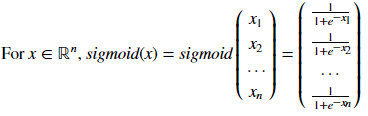


In [4]:
import math

def basic_sigmod(x):
    """
    # calculate single scalar sigmod value
    """
    s = 1.0/(1+1/math.exp(x))
    return s

print (basic_sigmod(3)) 


0.9525741268224334


In [6]:
import numpy as np

"""
#use numpy to work with matrix
"""
x = np.array([3, 2, 1]) 
print (np.exp(x)) 
print (x+3) 


[ 20.08553692   7.3890561    2.71828183]
[6 5 4]


In [7]:
import numpy as np

def sigmod(x):
    """
    #sigmod function for vector/matrix
    """
    s = 1/(1+1/np.exp(x)) 
    return s

x = np.array([3,2,1])
print (sigmod(x))


[ 0.95257413  0.88079708  0.73105858]


### 练习2 计算sigmod函数的导数

在之前的理论课程中，我们学习到了sigmod函数的导数公式如下：

sigmod_derivative(x) = f'(x) = f(x)(1-f(x))


In [8]:
import numpy as np

def sigmod_derivative(x):
    """
    Compute the gradient (also called the slope or derivative) of the sigmoid function with respect to its input x.
    You can store the output of the sigmoid function into variables and then use it to calculate the gradient.
     
    Arguments:
    x -- A scalar or numpy array
    Return:
    ds -- Your computed gradient.
    """
    
    s = 1.0 / (1+1/np.exp(x))
    ds = s * (1-s)
    
    return ds

x = np.array([1,2,3])
print (sigmod_derivative(x))


[ 0.19661193  0.10499359  0.04517666]


### 练习3：将一副图像转为为一个向量

在numpy中，有两个常用的函数：np.shape和np.reshape()。

其中，X.shape可以用于查看当前矩阵的维度。

X.reshape()可以用于修改矩阵的维度或形状。

例如，对于一副彩色图像，其通常是由一个三维矩阵组成的（RGB三个通道）。然而，在深度学习的应用中，我们通常需要将其转换为一个矢量，其长度为3*length*width。

即我们需要将一个三维的矩阵转换为一个一维的向量。

接下来，我们需要实现一个image2vector函数，其输入为一个三维矩阵（length, height, 3），输出为一个矢量。

In [11]:
import numpy as np

def image2vector(image):
    """
    Argument:
    image -- a numpy array of shape (length, height, depth)
    
    Returns:
    v -- a vector of shape (length*height*depth, 1)
    """
    
    v = image.reshape((image.shape[0]*image.shape[1]*image.shape[2], 1))
    
    return v

image = np.array([
        [
            [ 0.67826139,  0.29380381],
            [ 0.90714982,  0.52835647],
            [ 0.4215251,  0.45017551]
        ],
 
        [
            [ 0.92814219,  0.96677647],
            [ 0.85304703,  0.52351845],
            [ 0.19981397,  0.27417313]
        ],
 
        [
            [ 0.60659855,  0.00533165],
            [ 0.10820313,  0.49978937],
            [ 0.34144279,  0.94630077]
        ]
])

print ("image2vector(image) = " + str(image2vector(image)))


image2vector(image) = [[ 0.67826139]
 [ 0.29380381]
 [ 0.90714982]
 [ 0.52835647]
 [ 0.4215251 ]
 [ 0.45017551]
 [ 0.92814219]
 [ 0.96677647]
 [ 0.85304703]
 [ 0.52351845]
 [ 0.19981397]
 [ 0.27417313]
 [ 0.60659855]
 [ 0.00533165]
 [ 0.10820313]
 [ 0.49978937]
 [ 0.34144279]
 [ 0.94630077]]


### 练习4：按行归一化

在深度学习中，常用的一个技巧是需要对我们的数据进行归一化。

通过，在对数据进行归一化后，梯度下降算法的收敛速度会明显加快。

接下来，我们需要对一个矩阵进行按行归一化，归一化后的结果是每一个的长度为1。

例如：

x_normailized = x / ||x||

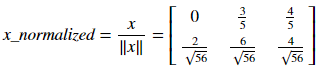

In [15]:
import numpy as np

def normalizeRows(x):
    """
    Implement a function that normalizes each row of the matrix x (to have unit length).
    
    Argument:
    x -- A numpy matrix of shape (n, m)
    
    Returns:
    x -- The normalized (by row) numpy matrix. You are allowed to modify x.
    """
    
    x_norm = np.linalg.norm(x, axis=1, keepdims=True) #计算每一行的长度，得到一个列向量
    x = x / x_norm #利用numpy的广播，用矩阵与列向量相除。
    
    return x

x = np.array([
    [0, 3, 4],
    [1, 6, 4]
])

print ("normalizeRows(x) = " + str(normalizeRows(x)))


normalizeRows(x) = [[ 0.          0.6         0.8       ]
 [ 0.13736056  0.82416338  0.54944226]]


### 练习5：广播的使用及softmax函数的实现

广播是numpy中一个非常强大的功能，它可以帮助我们对不同维度的矩阵、向量、标量之前快速计算。

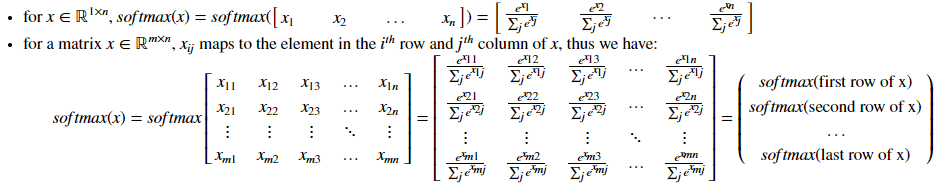